## IMPORT

In [70]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import joblib

## EDA

In [71]:
df1 = pd.read_csv("history_google_combined.csv")
df1

/tmp/ipykernel_4217/2915431540.py:1: DtypeWarning: Columns (28,29,31,33,34,36,37,38,41,46,47,49,50,58,60,61,62,63,65,66,73,74,75,78,81,82,83,84,85,86,89,95,98,99,100,102,103,104,105,106,107,109,112,113,118,122,123,125,139,141,142,143,144,145,146,147,150,151,152,154,155,156,157,158,159,160,162,164,165,166,167,168,170,171,172,173,174,179,180,181,182,183,184,185,186,187,189,190,191,192,193,194,196,197,198,199,200,201,203,204,206,207,208,210,211,213,214,215,217,218,219,220,222,223,224,225,232,233,234,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,274,275,276,277,278,280,281,282,283,284,285,286,287,288,289,290,291,293,294,295,297,298,299,301,303,304,305,306,307,310,311,312,313,314,315,316,318,319,323,324,325,326,327,328,329,330,331,332,333,335,336,337,338,339,341,342,343,345,346,348,361,362,363,364,365,366,367,368,372,373,374,375,376,377,378,379,380,381,382,384,385,386,387,388,390,391,392,393,394,39

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,count,...,og:postal-code,og:street-address,place:location:latitude,place:location:longitude,og:rich_attachment,alternativeheadline,trending_articles_bar_title,turbolinks-cache-control,turbolinks-visit-control,trim
0,manduka yoga mats,1,"High Quality Yoga Mats, Gear, and Clothing - M...","Manduka yoga mats, apparel and accessories are...",www.manduka.com,https://www.manduka.com/,2020-02-22 20:08:28.094930+00:00,1110000,wSf_tELTgYkJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,manduka yoga mats,2,Manduka PRO Yoga Mat - Premium 6mm Thick Mat ....,LIFETIME WARRANTY: Guaranteed to last a lifeti...,www.amazon.com,https://www.amazon.com/Manduka-PRO-Yoga-Mat-Pe...,2020-02-22 20:08:28.094930+00:00,1110000,DG7oAw2sf_kJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,manduka yoga mats,3,Yoga Mats - Find the Perfect Yoga Mat for Your...,Take the Mat Quiz PRO Yoga Mats The original M...,www.manduka.com,https://www.manduka.com/pages/collections-yoga...,2020-02-22 20:08:28.094930+00:00,1110000,1wWRNe6J8c0J,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,manduka yoga mats,4,Manduka Yoga Mats | Best Price Guarantee at DI...,Shop Manduka yoga mats online today at DICK'S ...,www.dickssportinggoods.com,https://www.dickssportinggoods.com/f/manduka,2020-02-22 20:08:28.094930+00:00,1110000,EjKPD4KiLgkJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,manduka yoga mats,5,"Yoga Sale - Yoga Mats, Clothing, Accessories o...",Yoga clearance sale! Find great deals on high ...,www.manduka.com,https://www.manduka.com/pages/sale-all-yoga-pr...,2020-02-22 20:08:28.094930+00:00,1110000,Zer6a-zdF6UJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,dodge durango price,6,Used Dodge Durango for Sale (with Photos) - CA...,Find the best Dodge Durango for sale near you....,www.carfax.com,https://www.carfax.com/Used-Dodge-Durango_w197,2020-02-22 19:05:29.084061+00:00,10900000,r_w6Bl_m4jYJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2116,dodge durango price,7,"2020 Dodge Durango Prices, Reviews & Pictures ...",Learn more about the 2020 Dodge Durango. See t...,www.kbb.com,https://www.kbb.com/dodge/durango/,2020-02-22 19:05:29.084061+00:00,10900000,wgEWWtG7xzkJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,dodge durango price,8,2020 Dodge Durango | Dodge Canada,The 2020 Dodge Durango is Canada's fastest and...,www.dodge.ca,https://www.dodge.ca/en/durango,2020-02-22 19:05:29.084061+00:00,10900000,i6LczMV9S5EJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2118,dodge durango price,9,Used Dodge Durango for Sale (with Photos) - Ca...,Listings 1 - 15 of 12842 ... Save $6056 on a u...,www.cargurus.com,https://www.cargurus.com/Cars/l-Used-Dodge-Dur...,2020-02-22 19:05:29.084061+00:00,10900000,-g_BAaKHTGkJ,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df = df1[["searchTerms", "title",	"snippet", "link"]]
df

,searchTerms,title,snippet,link
0,manduka yoga mats,"High Quality Yoga Mats, Gear, and Clothing - M...","Manduka yoga mats, apparel and accessories are...",https://www.manduka.com/
1,manduka yoga mats,Manduka PRO Yoga Mat - Premium 6mm Thick Mat ....,LIFETIME WARRANTY: Guaranteed to last a lifeti...,https://www.amazon.com/Manduka-PRO-Yoga-Mat-Pe...
2,manduka yoga mats,Yoga Mats - Find the Perfect Yoga Mat for Your...,Take the Mat Quiz PRO Yoga Mats The original M...,https://www.manduka.com/pages/collections-yoga...
3,manduka yoga mats,Manduka Yoga Mats | Best Price Guarantee at DI...,Shop Manduka yoga mats online today at DICK'S ...,https://www.dickssportinggoods.com/f/manduka
4,manduka yoga mats,"Yoga Sale - Yoga Mats, Clothing, Accessories o...",Yoga clearance sale! Find great deals on high ...,https://www.manduka.com/pages/sale-all-yoga-pr...
...,...,...,...,...
2115,dodge durango price,Used Dodge Durango for Sale (with Photos) - CA...,Find the best Dodge Durango for sale near you....,https://www.carfax.com/Used-Dodge-Durango_w197
2116,dodge durango price,"2020 Dodge Durango Prices, Reviews & Pictures ...",Learn more about the 2020 Dodge Durango. See t...,https://www.kbb.com/dodge/durango/
2117,dodge durango price,2020 Dodge Durango | Dodge Canada,The 2020 Dodge Durango is Canada's fastest and...,https://www.dodge.ca/en/durango
2118,dodge durango price,Used Dodge Durango for Sale (with Photos) - Ca...,Listings 1 - 15 of 12842 ... Save $6056 on a u...,https://www.cargurus.com/Cars/l-Used-Dodge-Dur...


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   searchTerms  2120 non-null   object
 1   title        2120 non-null   object
 2   snippet      2120 non-null   object
 3   link         2120 non-null   object
dtypes: object(4)
memory usage: 66.4+ KB


In [74]:
df_test = df.copy()
df_test['text'] = df_test['searchTerms'] + " " + df_test['title'] + " " + df_test['snippet']
col_to_drop = ['searchTerms', 'title', 'snippet']

In [75]:
df_test_clean = df_test.drop(col_to_drop, axis=1)
df_test_clean

,link,text
0,https://www.manduka.com/,"manduka yoga mats High Quality Yoga Mats, Gear..."
1,https://www.amazon.com/Manduka-PRO-Yoga-Mat-Pe...,manduka yoga mats Manduka PRO Yoga Mat - Premi...
2,https://www.manduka.com/pages/collections-yoga...,manduka yoga mats Yoga Mats - Find the Perfect...
3,https://www.dickssportinggoods.com/f/manduka,manduka yoga mats Manduka Yoga Mats | Best Pri...
4,https://www.manduka.com/pages/sale-all-yoga-pr...,"manduka yoga mats Yoga Sale - Yoga Mats, Cloth..."
...,...,...
2115,https://www.carfax.com/Used-Dodge-Durango_w197,dodge durango price Used Dodge Durango for Sal...
2116,https://www.kbb.com/dodge/durango/,"dodge durango price 2020 Dodge Durango Prices,..."
2117,https://www.dodge.ca/en/durango,dodge durango price 2020 Dodge Durango | Dodge...
2118,https://www.cargurus.com/Cars/l-Used-Dodge-Dur...,dodge durango price Used Dodge Durango for Sal...


In [76]:
df_test_clean.duplicated().sum()

321

In [77]:
df_test_clean = df_test_clean.drop_duplicates().reset_index(drop=True)
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    1799 non-null   object
 1   text    1799 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


In [78]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Supprimer les caractères spéciaux
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
    text = text.lower()  # Mettre en minuscule
    return text

# Appliquer le nettoyage au texte
df_test_clean['clean_text'] = df_test_clean['text'].apply(clean_text)

# Vectorisation avec TF-IDF
#tfidf = TfidfVectorizer(max_features=4000, ngram_range=(1, 3))
#X_tfidf = tfidf.fit_transform(df_test_clean['clean_text'])

# Créer et ajuster le TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1, 3))
documents = df_test_clean['clean_text'].tolist()
X_tfidf = vectorizer.fit_transform(documents)
#X_tfidf = vectorizer.fit_transform(df_test_clean['clean_text']).tolist()

In [79]:
df_test_clean = df_test_clean.drop("text", axis=1)

In [80]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   link        1799 non-null   object
 1   clean_text  1799 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


## MODELE

### kMeans

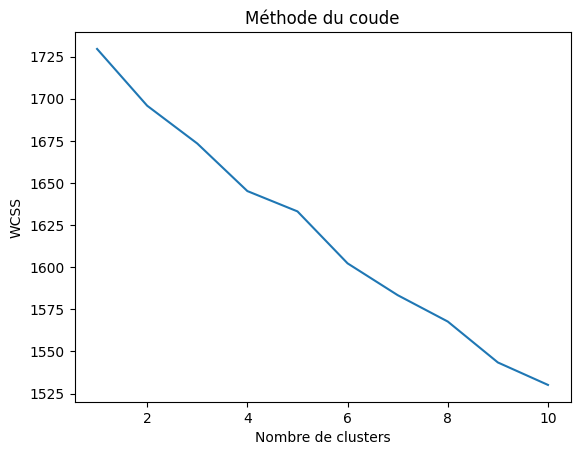

In [81]:
# Méthode du coude pour déterminer le nombre de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')  # Within-cluster Sum of Squares
plt.show()


In [82]:
num_clusters = 5  

# Appliquer K-Means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=20, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Ajouter les clusters au DataFrame original
df_test_clean['cluster'] = clusters

# Afficher un échantillon avec les clusters assignés
df_test_clean[['clean_text', 'cluster']]


,clean_text,cluster
0,manduka yoga mats high quality yoga mats gear ...,3
1,manduka yoga mats manduka pro yoga mat premium...,3
2,manduka yoga mats yoga mats find the perfect y...,3
3,manduka yoga mats manduka yoga mats best price...,3
4,manduka yoga mats yoga sale yoga mats clothing...,3
...,...,...
1794,dodge durango price 2020 dodge durango prices ...,3
1795,dodge durango price 2020 dodge durango srt per...,3
1796,dodge durango price used dodge durango for sal...,0
1797,dodge durango price 2020 dodge durango dodge c...,3


In [83]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    cluster_texts = df_test_clean[df_test_clean['cluster'] == i]['clean_text']
    print(cluster_texts.head(10))
    print("\n")


Cluster 0:
97     chevrolet malibu for sale used chevrolet malib...
98     chevrolet malibu for sale used chevrolet malib...
99     chevrolet malibu for sale used chevrolet malib...
101    chevrolet malibu for sale used chevrolet malib...
111    hyundai sonata for sale used hyundai sonata fo...
112    hyundai sonata for sale used hyundai sonata fo...
113    hyundai sonata for sale used hyundai sonata fo...
116    hyundai sonata for sale used hyundai sonata fo...
117    hyundai sonata for sale used hyundai sonatas f...
120    hyundai sonata for sale used hyundai sonata fo...
Name: clean_text, dtype: object


Cluster 1:
122    hyundai sonata for sale new used hyundai sonat...
123    hyundai sonata for sale used hyundai sonata fo...
126    hyundai sonata for sale used hyundai sonata ca...
171    kia sportage for sale used kia sportage for sa...
172    kia sportage for sale 2 111 used kia sportage ...
173    kia sportage for sale new used kia sportage ca...
174    kia sportage for sale use

### AgglomerativeClustering

In [84]:
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

clusters = agg_clustering.fit_predict(X_tfidf.toarray())

df_agglo = pd.DataFrame({'text': df_test_clean['clean_text'], 'cluster': clusters})

for cluster_num in sorted(df_agglo['cluster'].unique()):
    print(f"\nCluster {cluster_num}:")
    print(df_agglo[df_agglo['cluster'] == cluster_num]['text'].head(10))

/home/ndaoalassane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Cluster 0:
0    manduka yoga mats high quality yoga mats gear ...
1    manduka yoga mats manduka pro yoga mat premium...
2    manduka yoga mats yoga mats find the perfect y...
3    manduka yoga mats manduka yoga mats best price...
4    manduka yoga mats yoga sale yoga mats clothing...
5    manduka yoga mats find your soul mat a guide t...
6    manduka yoga mats manduka premium yoga mats yo...
7    manduka yoga mats manduka largest selection at...
8    manduka yoga mats yoga mats find the perfect y...
9    manduka yoga mats manduka prolite yoga mat rei...
Name: text, dtype: object

Cluster 1:
181    nissan sentra for sale used nissan sentra for ...
182    nissan sentra for sale used nissan sentra for ...
183    nissan sentra for sale used nissan sentra for ...
184    nissan sentra for sale used nissan sentra for ...
186    nissan sentra for sale nissan sentra for sale ...
191    nissan sentra for sale 2019 nissan sentra for ...
192    nissan sentra for sale nissan sentra for sale ...
1

### DBSCAN

In [85]:
#documents = df_test_clean['clean_text'].tolist()

In [86]:
dbscan = DBSCAN(eps=0.68, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(X_tfidf)

df_dbscan = pd.DataFrame({'text': df_test_clean['clean_text'], 'cluster': clusters})

for cluster_num in sorted(df_dbscan['cluster'].unique()):
    print(f"\nCluster {cluster_num}:")
    print(df_dbscan[df_dbscan['cluster'] == cluster_num]['text'].head(10))


Cluster 0:
0    manduka yoga mats high quality yoga mats gear ...
1    manduka yoga mats manduka pro yoga mat premium...
2    manduka yoga mats yoga mats find the perfect y...
3    manduka yoga mats manduka yoga mats best price...
4    manduka yoga mats yoga sale yoga mats clothing...
5    manduka yoga mats find your soul mat a guide t...
6    manduka yoga mats manduka premium yoga mats yo...
7    manduka yoga mats manduka largest selection at...
8    manduka yoga mats yoga mats find the perfect y...
9    manduka yoga mats manduka prolite yoga mat rei...
Name: text, dtype: object

Cluster 1:
30    basketball the official site of the nba nba co...
31    basketball basketball wikipedia basketball is ...
32    basketball basketball reference com basketball...
33    basketball basketball basics the rules concept...
34    basketball kid basketball pro vs adults horse ...
35    basketball the naismith memorial basketball ha...
36    basketball basketball definition history rules...
37    ba

In [87]:
df_dbscan.to_csv('resultat_dbscan.csv', index=False)

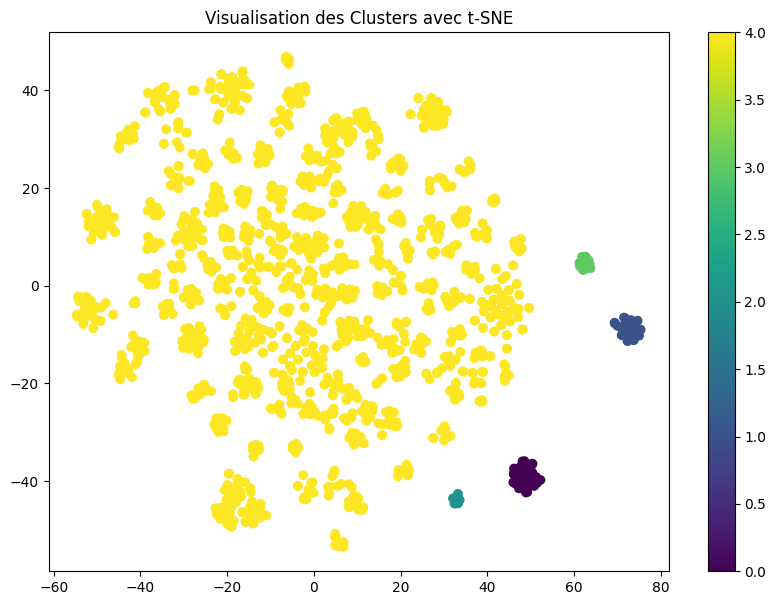

In [88]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Visualiser les clusters avec t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.title("Visualisation des Clusters avec t-SNE")
plt.show()

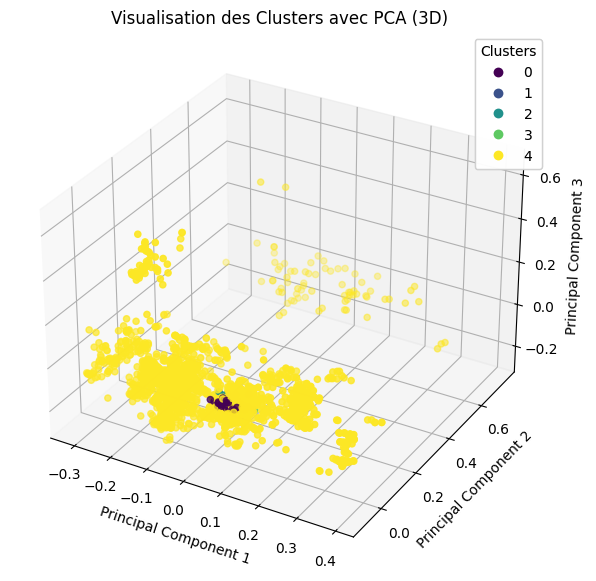

In [89]:
# Réduction de la dimensionnalité avec PCA à 3 composantes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_tfidf.toarray())

# Visualisation des clusters en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='viridis', marker='o')

# Ajouter une légende pour les couleurs
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title("Visualisation des Clusters avec PCA (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()


### joblib

In [90]:
joblib.dump(dbscan, 'dbscan_model.joblib')

['dbscan_model.joblib']

In [91]:
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [92]:
joblib.dump(X_tfidf, 'X_tfidf.joblib')

['X_tfidf.joblib']

In [93]:
df_car = pd.read_csv("cars_forsale_price_us_uk.csv")
df_car_clean = df_car[["searchTerms",	"rank",	"title",	"snippet",	"displayLink",	"link"]]
df_car_clean

,searchTerms,rank,title,snippet,displayLink,link
0,chevrolet malibu for sale,1,Used Chevrolet Malibu for Sale (with Photos) -...,Every used car for sale comes with a free CARF...,www.carfax.com,https://www.carfax.com/Used-Chevrolet-Malibu_w117
1,chevrolet malibu for sale,2,Used Chevrolet Malibu for Sale (with Photos) -...,Listings 1 - 15 of 24608 ... Save $4486 on a u...,www.cargurus.com,https://www.cargurus.com/Cars/l-Used-Chevrolet...
2,chevrolet malibu for sale,3,Used Chevrolet Malibu for Sale Near Me | Cars.com,Shop Chevrolet Malibu vehicles for sale at Car...,www.cars.com,https://www.cars.com/shopping/chevrolet-malibu/
3,chevrolet malibu for sale,4,Used Chevrolet Malibu for Sale Near You | Edmunds,Save up to $9463 on one of 11598 used Chevrole...,www.edmunds.com,https://www.edmunds.com/used-chevrolet-malibu/
4,chevrolet malibu for sale,5,Used Chevrolet Malibu for Sale,Used Chevrolet Malibu for Sale on carmax.com. ...,www.carmax.com,https://www.carmax.com/cars/chevrolet/malibu
...,...,...,...,...,...,...
1995,dodge durango price,6,Used Dodge Durango for Sale (with Photos) - CA...,Find the best Dodge Durango for sale near you....,www.carfax.com,https://www.carfax.com/Used-Dodge-Durango_w197
1996,dodge durango price,7,"2020 Dodge Durango Prices, Reviews & Pictures ...",Learn more about the 2020 Dodge Durango. See t...,www.kbb.com,https://www.kbb.com/dodge/durango/
1997,dodge durango price,8,2020 Dodge Durango | Dodge Canada,The 2020 Dodge Durango is Canada's fastest and...,www.dodge.ca,https://www.dodge.ca/en/durango
1998,dodge durango price,9,Used Dodge Durango for Sale (with Photos) - Ca...,Listings 1 - 15 of 12842 ... Save $6056 on a u...,www.cargurus.com,https://www.cargurus.com/Cars/l-Used-Dodge-Dur...


/tmp/ipykernel_4217/3410224017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_clean['tsne-2d-one'] = X_tsne[:, 0]
/tmp/ipykernel_4217/3410224017.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_clean['tsne-2d-two'] = X_tsne[:, 1]


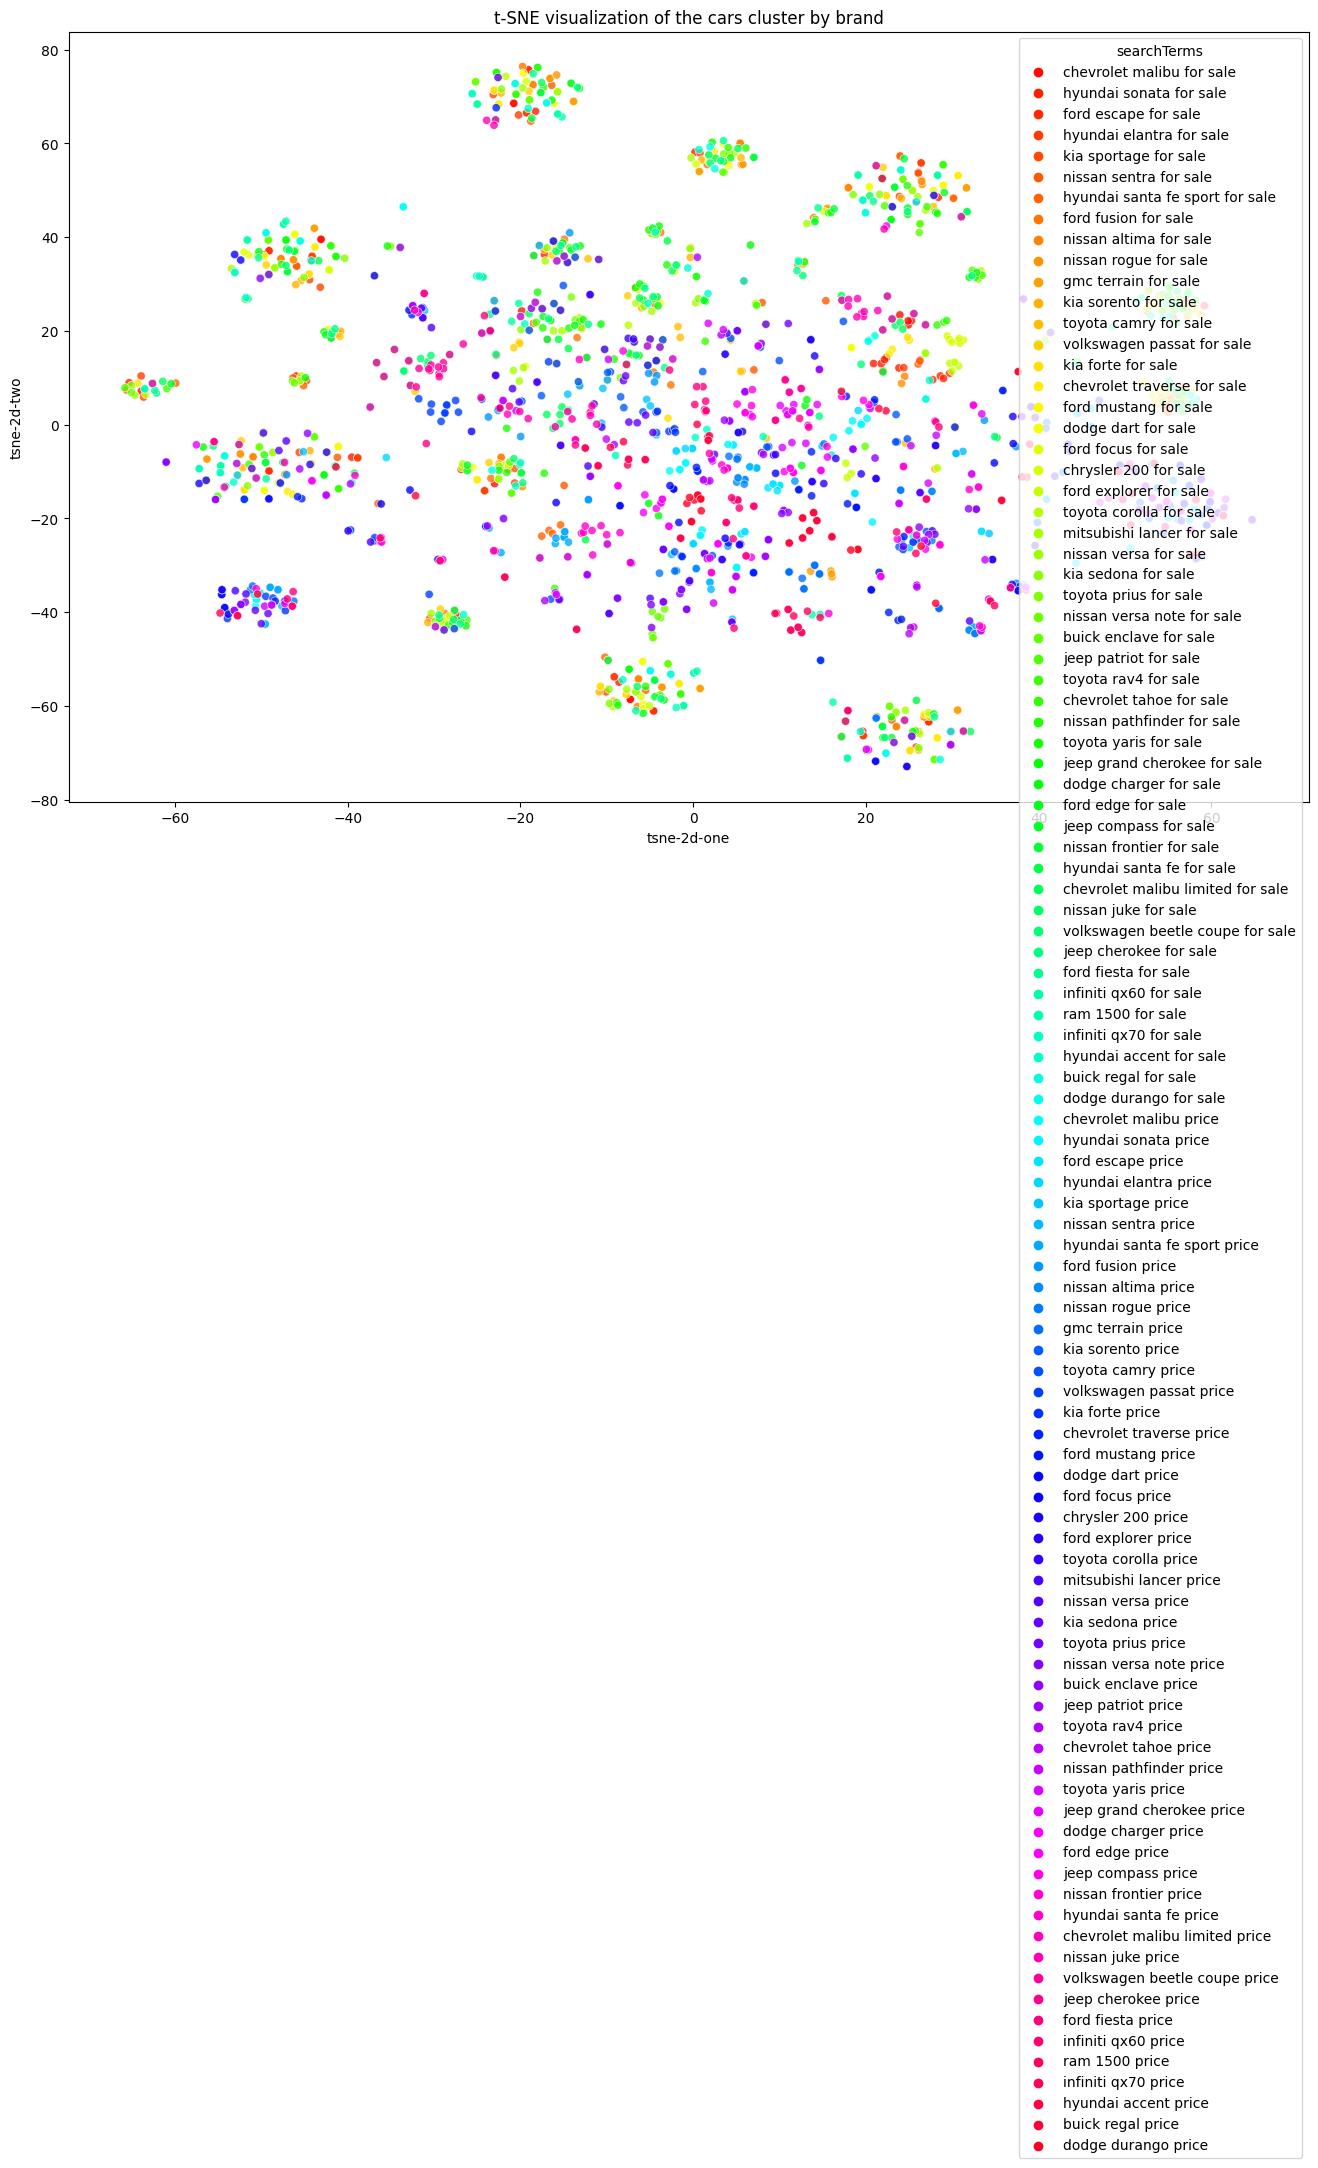

In [94]:
import seaborn as sns


# Suppose que df_car_clean est ton DataFrame avec une colonne contenant du texte
# Vectorisation du texte en utilisant TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_car_clean['snippet'])  # Remplace 'texte' par la colonne de ton texte

# Application de t-SNE sur les données vectorisées
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Ajouter les résultats de t-SNE au DataFrame
df_car_clean['tsne-2d-one'] = X_tsne[:, 0]
df_car_clean['tsne-2d-two'] = X_tsne[:, 1]

# Visualisation avec Seaborn
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="searchTerms",  # Assure-toi que la colonne 'brand' existe et contient les marques
    palette=sns.color_palette("hsv", len(df_car_clean['searchTerms'].unique())),
    data=df_car_clean,
    #legend="full",
    alpha=0.8
) 
plt.title('t-SNE visualization of the cars cluster by brand')
plt.show()


In [95]:
df_car_clean

,searchTerms,rank,title,snippet,displayLink,link,tsne-2d-one,tsne-2d-two
0,chevrolet malibu for sale,1,Used Chevrolet Malibu for Sale (with Photos) -...,Every used car for sale comes with a free CARF...,www.carfax.com,https://www.carfax.com/Used-Chevrolet-Malibu_w117,-52.765274,-10.793364
1,chevrolet malibu for sale,2,Used Chevrolet Malibu for Sale (with Photos) -...,Listings 1 - 15 of 24608 ... Save $4486 on a u...,www.cargurus.com,https://www.cargurus.com/Cars/l-Used-Chevrolet...,25.826530,47.551220
2,chevrolet malibu for sale,3,Used Chevrolet Malibu for Sale Near Me | Cars.com,Shop Chevrolet Malibu vehicles for sale at Car...,www.cars.com,https://www.cars.com/shopping/chevrolet-malibu/,-7.281376,-58.614799
3,chevrolet malibu for sale,4,Used Chevrolet Malibu for Sale Near You | Edmunds,Save up to $9463 on one of 11598 used Chevrole...,www.edmunds.com,https://www.edmunds.com/used-chevrolet-malibu/,-20.772570,68.541573
4,chevrolet malibu for sale,5,Used Chevrolet Malibu for Sale,Used Chevrolet Malibu for Sale on carmax.com. ...,www.carmax.com,https://www.carmax.com/cars/chevrolet/malibu,29.820604,-65.481796
...,...,...,...,...,...,...,...,...
1995,dodge durango price,6,Used Dodge Durango for Sale (with Photos) - CA...,Find the best Dodge Durango for sale near you....,www.carfax.com,https://www.carfax.com/Used-Dodge-Durango_w197,-41.361374,-9.016237
1996,dodge durango price,7,"2020 Dodge Durango Prices, Reviews & Pictures ...",Learn more about the 2020 Dodge Durango. See t...,www.kbb.com,https://www.kbb.com/dodge/durango/,0.872983,-15.854473
1997,dodge durango price,8,2020 Dodge Durango | Dodge Canada,The 2020 Dodge Durango is Canada's fastest and...,www.dodge.ca,https://www.dodge.ca/en/durango,0.927329,-18.390797
1998,dodge durango price,9,Used Dodge Durango for Sale (with Photos) - Ca...,Listings 1 - 15 of 12842 ... Save $6056 on a u...,www.cargurus.com,https://www.cargurus.com/Cars/l-Used-Dodge-Dur...,21.876602,52.509502


In [97]:
dbscan = DBSCAN(eps=0.68, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(X_tfidf)

df_dbscan2 = pd.DataFrame({'searchTerms': df_car_clean['searchTerms'], 'title': df_car_clean['title'], 'snippet': df_car_clean['snippet'],
                          'link': df_car_clean['link'],'cluster': clusters})

for cluster_num in sorted(df_dbscan['cluster'].unique()):
    print(f"\nCluster {cluster_num}:")
    print(df_dbscan2[df_dbscan2['cluster'] == cluster_num]['searchTerms'].head(10))


Cluster 0:
0     chevrolet malibu for sale
1     chevrolet malibu for sale
2     chevrolet malibu for sale
3     chevrolet malibu for sale
4     chevrolet malibu for sale
5     chevrolet malibu for sale
6     chevrolet malibu for sale
7     chevrolet malibu for sale
8     chevrolet malibu for sale
10    chevrolet malibu for sale
Name: searchTerms, dtype: object

Cluster 1:
9            chevrolet malibu for sale
89               kia sportage for sale
109             nissan sentra for sale
129    hyundai santa fe sport for sale
429            toyota corolla for sale
469              nissan versa for sale
479              nissan versa for sale
526         nissan versa note for sale
537         nissan versa note for sale
649              toyota yaris for sale
Name: searchTerms, dtype: object

Cluster 2:
157     ford fusion for sale
1165     nissan altima price
1173     nissan altima price
1476      nissan versa price
Name: searchTerms, dtype: object

Cluster 3:
255     toyota camry for sa